### Importando librerias

Comenzaremos importando las librerias basicas, matplotlib y seaborn para las graficas, pandas para el manejo de los datos y numpy para realizar operaciones.

In [1]:
import matplotlib.pyplot as plt
import pandas  as pd
import numpy   as np
import seaborn as sns

### Cargando el dataset

Carmgamos el dataset con pandas.

In [2]:
dataset = pd.read_csv('breast_cancer.csv')

### Eliminando la columna Id number

Eliminamos el atributo id number ya que no aporta a la solución del problema y causa ruido. Para esto utlizamos el método para DataFrames de pandas, drop con el nombre de la columna y el axis.

### Missing Values

Ahora que tenemos el dataset cargado y eliminamos la columna de id, vamos a buscar valores faltantes (o missing values). Comenzamos viendo información básica sobre los atributos faltantes del dataset con la libreria missingno.

In [4]:
import missingno as msn

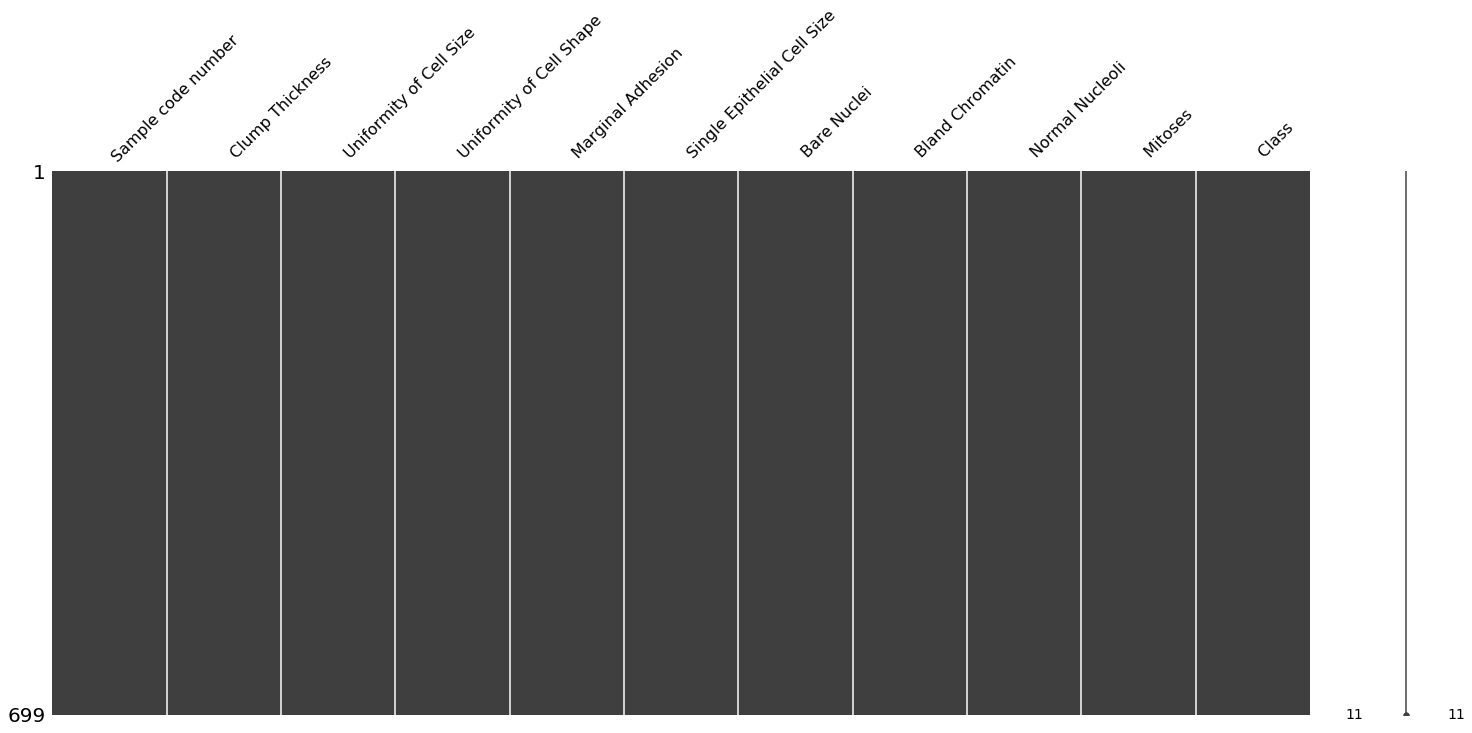

In [10]:
msn.matrix(dataset)

Podemos ver que a simple vista no se detectan outlier. Ahora vamos a analizar el tipo de los datos.

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample code number              699 non-null int64
 Clump Thickness                699 non-null int64
 Uniformity of Cell Size        699 non-null int64
 Uniformity of Cell Shape       699 non-null int64
 Marginal Adhesion              699 non-null int64
 Single Epithelial Cell Size    699 non-null int64
 Bare Nuclei                    699 non-null object
 Bland Chromatin                699 non-null int64
 Normal Nucleoli                699 non-null int64
 Mitoses                        699 non-null int64
 Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


Vemos que Bare **Nuclei 699 non-null object** no es de tipo entero, y sabemos que todos los atributos son enteros entre [0, 10].
A pesar de haber obtenido un total de 0.0% de missing values en nuestro análisis inicial vamos a ver si existen valores ? usando un filtro sobre el dataset en la bariable Bare Nuclei,

In [17]:
missing_values = dataset[dataset[' Bare Nuclei']=='?']
missing_values

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


Podemos verque la variable `Bare Nuclei` tiene varias ocurrencias con el valor `?`, estas no fueron detectadas como missing values ya que fueron consideradas como un valor `?`, los missing values suelen ser espacios en blanco o `NaN`.

Confirmamos que tiene missing values asi que vamos a averiguar cuantos missing values son y en base a eso podriamos tener una idea que medida tomar.

### Averiguando el impacto del missing value

In [19]:
dataset[' Class'].value_counts()

2    458
4    241
Name:  Class, dtype: int64

In [21]:
missing_values[' Class'].value_counts()

2    14
4     2
Name:  Class, dtype: int64

In [22]:
(100*14)/458

3.056768558951965

In [23]:
(100*2)/241

0.8298755186721992

Para los casos benignos (458) tenemos un `3.056%` de missing values mientras que para los casos malignos (241) tenemos un total de `0.829%` missing values.

Son relativamente pocos valores y no tenemos una forma exacta de estimarlos por lo cual vamos a removerlos.

In [26]:
dataset = dataset.drop(dataset.index[missing_values.index])
dataset[dataset[' Bare Nuclei']=='?']

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
